In [1]:
import os

import numpy as np

import networkx as nx

import matplotlib.pyplot as plt

from IPython.display import clear_output

from statsmodels.distributions.empirical_distribution import ECDF

In [2]:
#dict percentili
percentili = {0.1:0,0.2:0,0.3:0,0.4:0,0.5:0,0.6:0,0.7:0,0.8:0,0.9:0,1.0:0}

In [ ]:
for i in range(7):
    percentili_edges = {0.1:[],0.2:[],0.3:[],0.4:[],0.5:[],0.6:[],0.7:[],0.8:[],0.9:[],1.0:[]}
    print('_________________________________________________')
    print('Computing file {}'.format(i))
    edges = list(np.load('data/make_network_output/edges_var2_5_{}.npy'.format(i), allow_pickle = True))
    print('Done with {}'.format(i))
    for idx, e in enumerate(edges):
        print('{}/{} of file {}'.format(idx,len(edges),i))
        for percentile in percentili_edges.keys():
            if e[0][2] < percentile and e[0][2]>=(percentile-0.1):
                percentili[percentile] += 1
                percentili_edges[percentile].append(e)
        if e[0][2] == 1.0:
            percentili[1.0] += 1
            percentili_edges[1.0].append(e)
        clear_output(wait=True)   
    print('Printing output files')
    for id_p, percentiles in enumerate(percentili_edges.values()):
        np.save('data/percentile/percentile_{}_{}.npy'.format(id_p, i), percentiles)
        
np.save('data/percentile/counter_percentile_0.npy', percentili)

11055469/20391903 of file 1


# loading final data

In [10]:
percentili = {0.1:0,0.2:0,0.3:0,0.4:0,0.5:0,0.6:0,0.7:0,0.8:0,0.9:0,1.0:0}
indices = ['0','1','2_2']
for i in range(3):
    temp_perc = dict(np.load('data/percentile/counter_percentile_{}.npy'.format(indices[i]),allow_pickle=True).tolist())
    for percentile in percentili.keys():
        percentili[percentile] += temp_perc[percentile]

In [11]:
percentili

{0.1: 4091640,
 0.2: 14118256,
 0.3: 21763315,
 0.4: 6735286,
 0.5: 4844935,
 0.6: 5746230,
 0.7: 2673037,
 0.8: 25675,
 0.9: 163070,
 1.0: 146559}

In [29]:
print('Printing ECDF')
sums = 0
arr_sums=[]
for idx, percentile in enumerate(percentili.values()):
    sums += percentile
    if idx == 9:
        print('vaues <= 0.1:\t{}'.format(sums))
        arr_sums.append(sums)
    else:
        print('vaues <= 0.{}9:\t{}'.format(idx, sums))
        arr_sums.append(sums)

Printing ECDF
vaues <= 0.09:	4091640
vaues <= 0.19:	18209896
vaues <= 0.29:	39973211
vaues <= 0.39:	46708497
vaues <= 0.49:	51553432
vaues <= 0.59:	57299662
vaues <= 0.69:	59972699
vaues <= 0.79:	59998374
vaues <= 0.89:	60161444
vaues <= 0.1:	60308003


In [27]:
x = np.arange(0.09,1.0,0.1)

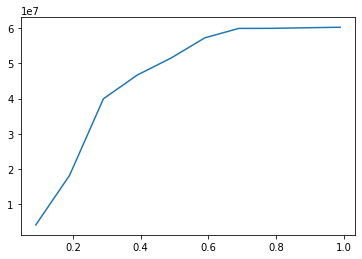

In [30]:
plt.plot(x,arr_sums)

# potrei prendere i valori maggiori di 0.39

In [31]:
60308003-46708497 #link totali

13599506

In [32]:
60308003*20/100

12061600.6